In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

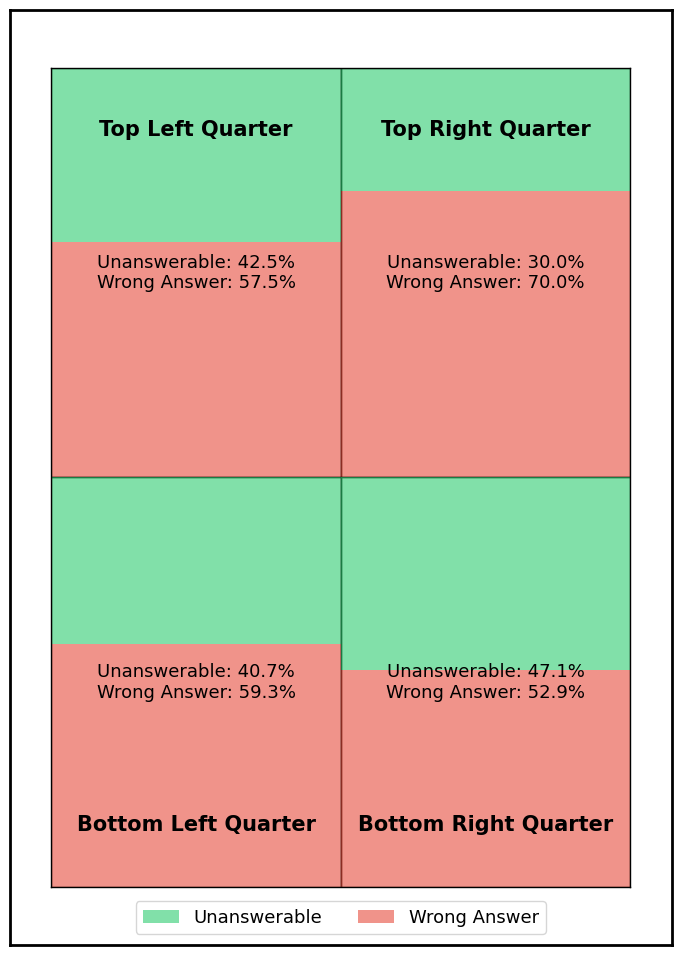

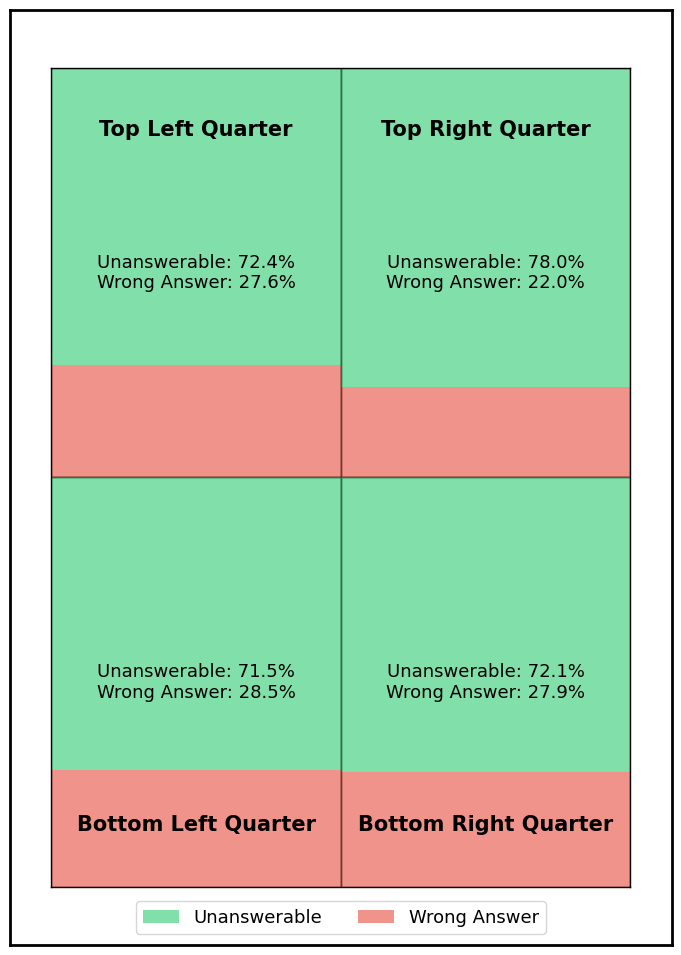

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Data organization
quarters_data = {
    'Phi': [
        (0.42528735632183906, 0.5747126436781609),
        (0.3, 0.7),
        (0.4065040650406504, 0.5934959349593496),
        (0.47115384615384615, 0.5288461538461539)
    ],
    'Qwen': [
        (0.7241379310344828, 0.27586206896551724),
        (0.78, 0.22),
        (0.7154471544715447, 0.2845528455284553),
        (0.7211538461538461, 0.27884615384615385)
    ]
}

def draw_quarter(ax, x, y, width, height, right_ratio, color_right='#2ecc71', color_wrong='#e74c3c'):
    # Draw the full quarter rectangle
    ax.add_patch(patches.Rectangle((x, y), width, height, fill=False, color='black'))
    
    # Calculate the split position based on the ratio
    split_y = y + (height * (1 - right_ratio))  # Vertical split from bottom
    
    # Right answers (top portion)
    ax.add_patch(patches.Rectangle((x, split_y), width, height * right_ratio, 
                                 facecolor=color_right, alpha=0.6))
    # Wrong answers (bottom portion)
    ax.add_patch(patches.Rectangle((x, y), width, height * (1-right_ratio), 
                                 facecolor=color_wrong, alpha=0.6))
    
    # Add percentage text
    ax.text(x + width/2, y + height/2, 
            f'Unanswerable: {right_ratio:.1%}\nWrong Answer: {(1-right_ratio):.1%}',
            ha='center', va='center', fontsize=13)

def create_model_plot(model, data):
    # Create figure with A4 dimensions
    fig = plt.figure(figsize=(8.27, 11.69))
    
    # Create outer border
    outer_ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    outer_ax.set_xticks([])
    outer_ax.set_yticks([])
    for spine in outer_ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(2)
    
    # Create main axes with proper margins
    margin = 0.15
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    
    # Set limits and aspect ratio
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    
    # Draw each quarter with its proportional split
    # Top left
    draw_quarter(ax, 0, 1, 1, 1, data[0][0])
    # Top right
    draw_quarter(ax, 1, 1, 1, 1, data[1][0])
    # Bottom left
    draw_quarter(ax, 0, 0, 1, 1, data[2][0])
    # Bottom right
    draw_quarter(ax, 1, 0, 1, 1, data[3][0])
    
    # Customize appearance
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add grid
    ax.grid(True, color='black', linestyle='-', linewidth=0.5)
    ax.set_facecolor('white')
    
    # Add border
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)
    
    # Add quarter labels
    ax.text(0.5, 1.85, 'Top Left Quarter', ha='center', va='center', fontsize=15, fontweight='bold')
    ax.text(1.5, 1.85, 'Top Right Quarter', ha='center', va='center', fontsize=15, fontweight='bold')
    ax.text(0.5, 0.15, 'Bottom Left Quarter', ha='center', va='center', fontsize=15, fontweight='bold')
    ax.text(1.5, 0.15, 'Bottom Right Quarter', ha='center', va='center', fontsize=15, fontweight='bold')
    
    # Add legend
    legend_elements = [
        patches.Patch(facecolor='#2ecc71', alpha=0.6, label='Unanswerable'),
        patches.Patch(facecolor='#e74c3c', alpha=0.6, label='Wrong Answer')
    ]
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.007), ncol=2, fontsize=13)

    # Save the plot
    fig.savefig(f'plots/{model}_position.pdf', dpi=300, bbox_inches='tight')
    
    plt.show()

# Create individual plots for each model
for model, data in quarters_data.items():
    create_model_plot(model, data)

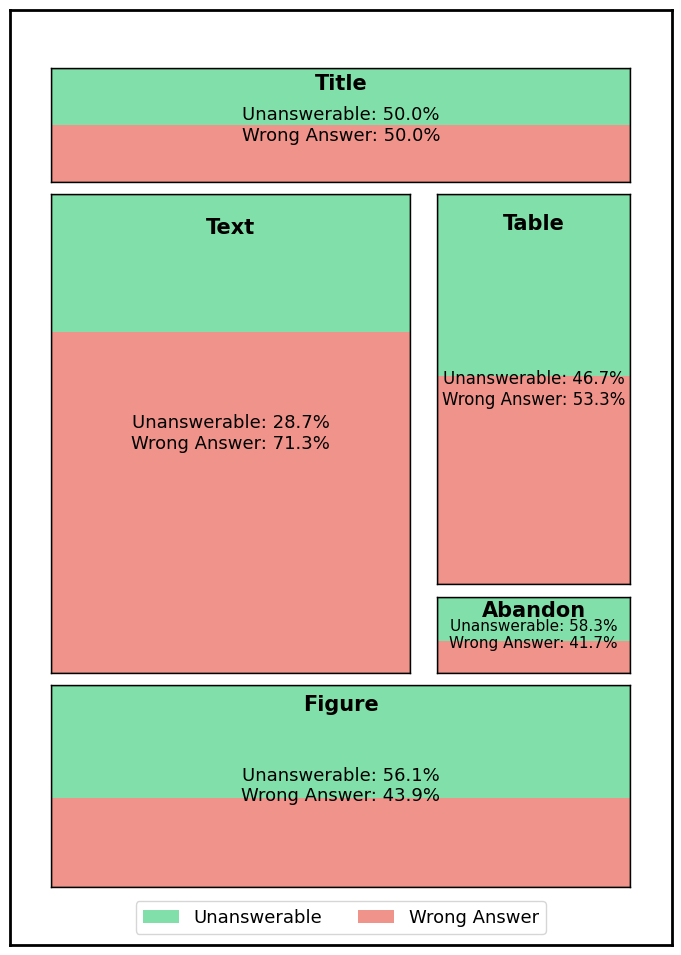

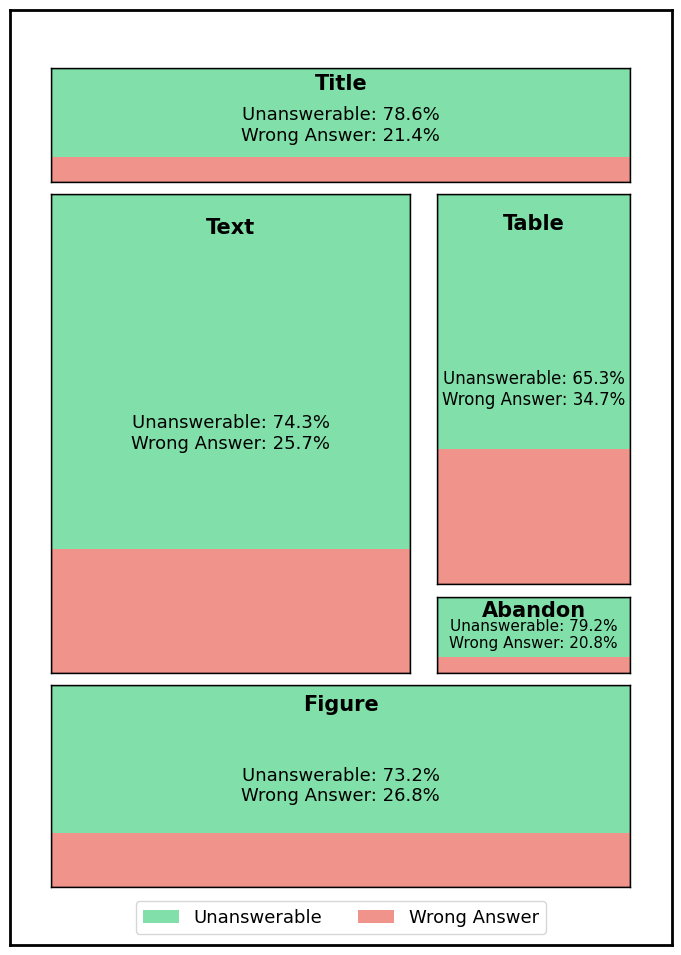

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec

# Data for all models (same as before)
models_data = {
    'Phi': {
        'Title': (0.5, 0.5),
        'Text': (0.2874251497005988, 0.7125748502994012),
        'Table': (0.4666666666666667, 0.5333333333333333),
        'Abandon': (0.5833333333333334, 0.4166666666666667),
        'Figure': (0.5609756097560976, 0.43902439024390244)
    },
    'Qwen': {
        'Title': (0.7857142857142857, 0.21428571428571427),
        'Text': (0.7425149700598802, 0.25748502994011974),
        'Table': (0.6533333333333333, 0.3466666666666667),
        'Abandon': (0.7916666666666666, 0.20833333333333334),
        'Figure': (0.7317073170731707, 0.2682926829268293)
    }
}

def draw_section(ax, right_ratio, wrong_ratio, section_name):
    # Get axes dimensions
    bbox = ax.get_window_extent().transformed(ax.figure.dpi_scale_trans.inverted())
    width, height = bbox.width, bbox.height
    
    # Draw filled sections (vertical split)
    split_y = 1 - right_ratio
    
    # Draw the sections with black edges
    ax.add_patch(patches.Rectangle((0, split_y), 1, right_ratio, 
                                 facecolor='#2ecc71', alpha=0.6,
                                  linewidth=1))
    ax.add_patch(patches.Rectangle((0, 0), 1, split_y, 
                                 facecolor='#e74c3c', alpha=0.6,
                                  linewidth=1))
    
    # Draw outer border
    ax.add_patch(patches.Rectangle((0, 0), 1, 1, fill=False, 
                                 edgecolor='black', linewidth=1))
    
    # Set all spines to black
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1)
    
    # Add title at fixed position from top
    
    ax.text(0.5, 0.95, section_name,
            ha='center', va='top', fontsize=15, fontweight='bold')
    
    if section_name in ['Table']:
    # Add percentages in the center
        ax.text(0.5, 0.5, f'Unanswerable: {right_ratio:.1%}\nWrong Answer: {wrong_ratio:.1%}',ha='center', va='center', fontsize=12)
    elif section_name in ['Abandon']:
        ax.text(0.5, 0.5, f'Unanswerable: {right_ratio:.1%}\nWrong Answer: {wrong_ratio:.1%}',ha='center', va='center', fontsize=11)
    else:
        ax.text(0.5, 0.5, f'Unanswerable: {right_ratio:.1%}\nWrong Answer: {wrong_ratio:.1%}',ha='center', va='center', fontsize=13)

def create_model_layout(model_name, model_data):
    # Create figure with A4 dimensions
    fig = plt.figure(figsize=(8.27, 11.69))
    fig.patch.set_facecolor('white')
    
    # Create outer border
    outer_ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    outer_ax.set_xticks([])
    outer_ax.set_yticks([])
    for spine in outer_ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(2)
    
    # Create layout grid with adjusted proportions
    gs = gridspec.GridSpec(6, 2, figure=fig, 
                          left=0.15, right=0.85, 
                          top=0.85, bottom=0.15,
                          height_ratios=[0.15, 0.35, 0.15, 0.1, 0.15, 0.1],
                          width_ratios=[0.65, 0.35],
                          hspace=0.1, wspace=0.1)
    
    # Title area
    title_ax = fig.add_subplot(gs[0, :])
    title_ax.set_xticks([])
    title_ax.set_yticks([])
    draw_section(title_ax, *model_data['Title'], 'Title')
    
    # Text area (spans multiple rows)
    text_ax = fig.add_subplot(gs[1:4, 0])
    text_ax.set_xticks([])
    text_ax.set_yticks([])
    draw_section(text_ax, *model_data['Text'], 'Text')
    
    # Table area (wider than before)
    table_ax = fig.add_subplot(gs[1:3, 1])
    table_ax.set_xticks([])
    table_ax.set_yticks([])
    draw_section(table_ax, *model_data['Table'], 'Table')
    
    # Abandon area
    abandon_ax = fig.add_subplot(gs[3, 1])
    abandon_ax.set_xticks([])
    abandon_ax.set_yticks([])
    draw_section(abandon_ax, *model_data['Abandon'], 'Abandon')
    
    # Figure area (shorter and wider)
    figure_ax = fig.add_subplot(gs[4:, :])
    figure_ax.set_xticks([])
    figure_ax.set_yticks([])
    draw_section(figure_ax, *model_data['Figure'], 'Figure')
    
    legend_elements = [
        patches.Patch(facecolor='#2ecc71', alpha=0.6, label='Unanswerable'),
        patches.Patch(facecolor='#e74c3c', alpha=0.6, label='Wrong Answer')
    ]
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.145), ncol=2, fontsize=13)

    # Save the figure
    fig.savefig(f'plots/{model_name}_layout.pdf', dpi=300, bbox_inches='tight')
    
    plt.show()

# Create a layout for each model
for model_name, model_data in models_data.items():
    create_model_layout(model_name, model_data)